# Classificação do conjunto de dados Íris

### Definição do Problema

O conjunto de dados contém três classes com 50 instâncias cada, onde cada classe se refere a um tipo de planta de íris. As classes são linearmente separáveis umas das outras.

Atributo de predição: classe de planta de íris.



### Importação das bibliotecas

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes

### Carregando e definindo as colunas do dataset

In [2]:
columns = ['sepal_comprimento','sepal_largura','petal_comprimento','petal_largura','tipo']
data = pd.read_csv('iris-dataset.csv',names=columns)

### Visualização e descrição dos dados

In [3]:
data.head(10)

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura,tipo
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
data.describe()

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
print(data.shape)

(150, 5)


In [6]:
print(data.groupby('tipo').size())

tipo
setosa        50
versicolor    50
virginica     50
dtype: int64


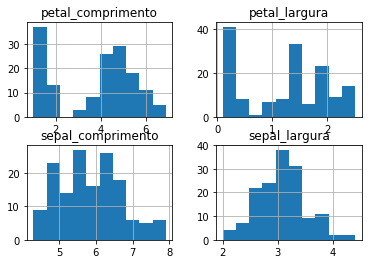

In [7]:
data.hist();

In [8]:
data.corr()

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura
sepal_comprimento,1.000000,-0.109369,0.871754,0.817954
sepal_largura,-0.109369,1.000000,-0.420516,-0.356544
petal_comprimento,0.871754,-0.420516,1.000000,0.962757
petal_largura,0.817954,-0.356544,0.962757,1.000000


### Criação do dataset de validação

In [9]:
dataset = data.values
print(dataset)

[[5.1 3.5 1.4 0.2 'setosa']
 [4.9 3.0 1.4 0.2 'setosa']
 [4.7 3.2 1.3 0.2 'setosa']
 [4.6 3.1 1.5 0.2 'setosa']
 [5.0 3.6 1.4 0.2 'setosa']
 [5.4 3.9 1.7 0.4 'setosa']
 [4.6 3.4 1.4 0.3 'setosa']
 [5.0 3.4 1.5 0.2 'setosa']
 [4.4 2.9 1.4 0.2 'setosa']
 [4.9 3.1 1.5 0.1 'setosa']
 [5.4 3.7 1.5 0.2 'setosa']
 [4.8 3.4 1.6 0.2 'setosa']
 [4.8 3.0 1.4 0.1 'setosa']
 [4.3 3.0 1.1 0.1 'setosa']
 [5.8 4.0 1.2 0.2 'setosa']
 [5.7 4.4 1.5 0.4 'setosa']
 [5.4 3.9 1.3 0.4 'setosa']
 [5.1 3.5 1.4 0.3 'setosa']
 [5.7 3.8 1.7 0.3 'setosa']
 [5.1 3.8 1.5 0.3 'setosa']
 [5.4 3.4 1.7 0.2 'setosa']
 [5.1 3.7 1.5 0.4 'setosa']
 [4.6 3.6 1.0 0.2 'setosa']
 [5.1 3.3 1.7 0.5 'setosa']
 [4.8 3.4 1.9 0.2 'setosa']
 [5.0 3.0 1.6 0.2 'setosa']
 [5.0 3.4 1.6 0.4 'setosa']
 [5.2 3.5 1.5 0.2 'setosa']
 [5.2 3.4 1.4 0.2 'setosa']
 [4.7 3.2 1.6 0.2 'setosa']
 [4.8 3.1 1.6 0.2 'setosa']
 [5.4 3.4 1.5 0.4 'setosa']
 [5.2 4.1 1.5 0.1 'setosa']
 [5.5 4.2 1.4 0.2 'setosa']
 [4.9 3.1 1.5 0.1 'setosa']
 [5.0 3.2 1.2 0.2 's

In [10]:
np.random.seed(1)
np.random.shuffle(dataset)

In [11]:
dataset

array([[5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.1, 2.5, 3.0, 1.1, 'versicolor'],
       [6.6, 3.0, 4.4, 1.4, 'versicolor'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [7.9, 3.8, 6.4, 2.0, 'virginica'],
       [6.3, 3.3, 4.7, 1.6, 'versicolor'],
       [6.9, 3.1, 5.1, 2.3, 'virginica'],
       [5.1, 3.8, 1.9, 0.4, 'setosa'],
       [4.7, 3.2, 1.6, 0.2, 'setosa'],
       [6.9, 3.2, 5.7, 2.3, 'virginica'],
       [5.6, 2.7, 4.2, 1.3, 'versicolor'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [7.1, 3.0, 5.9, 2.1, 'virginica'],
       [6.4, 3.2, 4.5, 1.5, 'versicolor'],
       [6.0, 2.9, 4.5, 1.5, 'versicolor'],
       [4.4, 3.2, 1.3, 0.2, 'setosa'],
       [5.8, 2.6, 4.0, 1.2, 'versicolor'],
       [5.6, 3.0, 4.5, 1.5, 'versicolor'],
       [5.4, 3.4, 1.5, 0.4, 'setosa'],
       [5.0, 3.2, 1.2, 0.2, 'setosa'],
       [5.5, 2.6, 4.4, 1.2, 'versicolor'],
       [5.4, 3.0, 4.5, 1.5, 'versicolor'],
       [6.7, 3.0, 5.0, 1.7, 'versicolor'],
       [5.0, 3.5, 1.3, 0.3, 'setosa'],
       [

In [12]:
X = dataset[:,:4]
y = dataset[:,4]

In [13]:
n_train = int(round(len(y) * 0.75))
X_train = X[:n_train,:]
y_train = y[:n_train]
X_test = X[n_train:,:]
y_test = y[n_train:]

In [14]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((150, 4), (150,), (112, 4), (112,), (38, 4), (38,))

### Criação dos modelos

#### Classificadores utilizados:

- DecisionTreeClassifier
- SVC
- KNN
- Logistic Regression
- Naive Bayes
- SGDClassifier
- RandomForest
- GradientBoosting

In [15]:
model_decisiontree = tree.DecisionTreeClassifier()
model_svc = svm.SVC()
model_knn = neighbors.KNeighborsClassifier()
model_logisticregression = linear_model.LogisticRegression(multi_class='multinomial',solver='newton-cg')
model_naivebayes = naive_bayes.GaussianNB()
model_sgdclassifier = linear_model.SGDClassifier()
model_randomforest = ensemble.RandomForestClassifier()
model_gradientboosting = ensemble.GradientBoostingClassifier()

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [16]:
model_decisiontree.fit(X_train,y_train)
model_svc.fit(X_train,y_train)
model_knn.fit(X_train,y_train)
model_logisticregression.fit(X_train,y_train)
model_naivebayes.fit(X_train,y_train)
model_sgdclassifier.fit(X_train,y_train)
model_randomforest.fit(X_train,y_train)
model_gradientboosting.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [17]:
pred_decisiontree = model_decisiontree.predict(X_test)
pred_svc = model_svc.predict(X_test)
pred_knn = model_knn.predict(X_test)
pred_logisticregression = model_logisticregression.predict(X_test)
pred_naivebayes = model_naivebayes.predict(X_test)
pred_sgdclassifier = model_sgdclassifier.predict(X_test)
pred_randomforest = model_randomforest.predict(X_test)
pred_gradientboosting = model_gradientboosting.predict(X_test)

### Resultados

#### DecisionTreeClassifier

In [18]:
print(metrics.classification_report(y_test, pred_decisiontree))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       0.75      0.86      0.80        14
  virginica       0.75      0.60      0.67        10

avg / total       0.84      0.84      0.84        38



In [19]:
dtc = metrics.accuracy_score(y_test, pred_decisiontree)
print(dtc)

0.842105263158


#### C-Support Vector Classification (SVC)

In [20]:
print(metrics.classification_report(y_test, pred_svc))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       0.93      1.00      0.97        14
  virginica       1.00      0.90      0.95        10

avg / total       0.98      0.97      0.97        38



In [21]:
svc = metrics.accuracy_score(y_test, pred_svc)
print(svc)

0.973684210526


#### KNeighborsClassifier (KNN)

In [22]:
print(metrics.classification_report(y_test, pred_knn))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       0.92      0.86      0.89        14
  virginica       0.82      0.90      0.86        10

avg / total       0.92      0.92      0.92        38



In [23]:
knn = metrics.accuracy_score(y_test, pred_knn)
print(knn)

0.921052631579


#### LogisticRegression

In [24]:
print(metrics.classification_report(y_test, pred_logisticregression))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       0.87      0.93      0.90        14
  virginica       0.89      0.80      0.84        10

avg / total       0.92      0.92      0.92        38



In [25]:
lr = metrics.accuracy_score(y_test, pred_logisticregression)
print(lr)

0.921052631579


#### GaussianNB

In [26]:
print(metrics.classification_report(y_test, pred_naivebayes))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       0.81      0.93      0.87        14
  virginica       0.88      0.70      0.78        10

avg / total       0.90      0.89      0.89        38



In [27]:
nb = metrics.accuracy_score(y_test, pred_naivebayes)
print(nb)

0.894736842105


#### SGDClassifier

In [28]:
print(metrics.classification_report(y_test, pred_sgdclassifier))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       0.87      0.93      0.90        14
  virginica       0.89      0.80      0.84        10

avg / total       0.92      0.92      0.92        38



In [29]:
sgd = metrics.accuracy_score(y_test, pred_sgdclassifier)
print(sgd)

0.921052631579


#### RandomForestClassifier

In [30]:
print(metrics.classification_report(y_test, pred_randomforest))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       0.81      0.93      0.87        14
  virginica       0.88      0.70      0.78        10

avg / total       0.90      0.89      0.89        38



In [31]:
rf = metrics.accuracy_score(y_test, pred_randomforest)
print(rf)

0.894736842105


#### GradientBoostingClassifier

In [32]:
print(metrics.classification_report(y_test, pred_gradientboosting))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       0.76      0.93      0.84        14
  virginica       0.86      0.60      0.71        10

avg / total       0.88      0.87      0.86        38



In [33]:
gb = metrics.accuracy_score(y_test, pred_gradientboosting)
print(gb)

0.868421052632


### Comparando os resultados

In [34]:
class_names = ['DTC','SVC','KNN','LR','NB','SGD','RF','GB']
class_ = [dtc,svc,knn,lr,nb,sgd,rf,gb]
for i in range(0,len(class_names)):
    print(class_names[i] + ': ' + str(class_[i]))

DTC: 0.842105263158
SVC: 0.973684210526
KNN: 0.921052631579
LR: 0.921052631579
NB: 0.894736842105
SGD: 0.921052631579
RF: 0.894736842105
GB: 0.868421052632


([<matplotlib.axis.XTick at 0x10ef79128>,
 <a list of 8 Text xticklabel objects>)

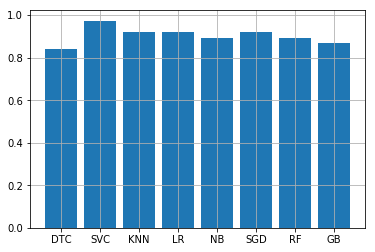

In [36]:
plt.grid()
plt.bar(range(len(class_names)),class_)
plt.xticks(range(len(class_names)), class_names)